# **Segmentação - OTSU**

## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import scipy.signal
from scipy import ndimage

## Carregando Imagem em Preto e Branco

In [2]:
img = cv2.cvtColor(cv2.imread("camera_man.png"), cv2.COLOR_BGR2GRAY)

## Apresentando imagem

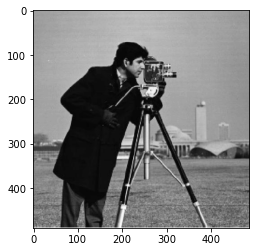

In [3]:
plt.imshow(img, cmap="gray")
plt.show()

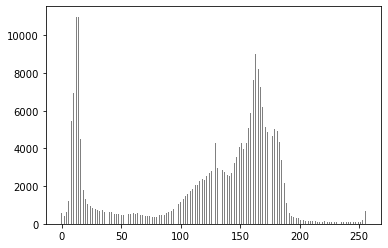

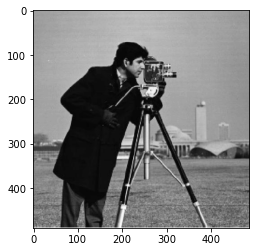

/home/daniel/miniconda3/envs/img/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
/home/daniel/miniconda3/envs/img/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


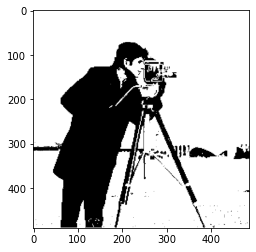

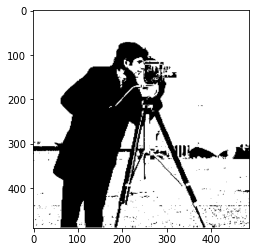

In [15]:
def threshold(image, L):
    mask = np.zeros(image.shape)
    mask[np.where(image > L)] = 1

    return mask

def histograma(img):
    row, col = img.shape
    hist = np.zeros((256), dtype='uint32')
    for i in range(0,row):
        for j in range(0,col):
            hist[img[i,j]] += 1
  
    return hist

def otsu_segmentation(image):
    hist = histograma(img)
    pixel_qtd = np.sum(hist)
    img_mean = np.sum(image)/pixel_qtd

    var_list = []
    for L in range(256):
        var_a = 0
        var_b = 0
        wa = 0
        wb = 0
        for i in range(256):
            if i < L:
                wa += hist[i] / pixel_qtd
                var_a += ((hist[i] - img_mean)**2) / (L-1)
            else:
                wb += hist[i] / pixel_qtd
                var_b += ((hist[i] - img_mean)**2) / (255-L)
        var_list.append(wa*var_a + wb*var_b)
    otsu_L = np.argmin(var_list)
    new_image = threshold(image, otsu_L)
  
    return new_image

#Apresenta o histograma

row, col = img.shape
h = histograma(img)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")
plt.show()

plt.imshow(img, cmap="gray")
plt.show()

mask = otsu_segmentation(img)
plt.imshow(mask, cmap="gray")
plt.show()

_,mask = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask, cmap="gray")
plt.show()